### Import lib

In [1]:
import os
os.chdir("/cerea_raid/users/dumontj/dev/coco2/dl")
import numpy as np
import sys
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt
from treeconfigparser import TreeConfigParser

import models.seg as sm
from data.Data import Data

### Loss functions

In [2]:
def pixel_weighted_cross_entropy(y_true, y_pred):    
    y_bin_true = tf.cast(y_true > 0, y_true.dtype)
    loss_val = keras.losses.binary_crossentropy(y_bin_true, y_pred)
    weights = tf.where(y_true > 0, y_true, 1.)
    loss_val = tf.convert_to_tensor(tf.squeeze(weights), np.float32)*loss_val
    return K.mean(loss_val)

### Data download

In [21]:
config_file = "nb/sim/cfg/seg_par.cfg"
config = TreeConfigParser()
config.readfiles(config_file)
data = Data(config)
data.prepareXCO2Data()

x_train.shape[0] (3571, 160, 160, 1)
y_train.shape (3571, 160, 160, 1)


### Model def

In [22]:
model = sm.Unet_2(1, data.Ny, data.Nx, data.N_input_channels)
model.compile('adam', loss=pixel_weighted_cross_entropy)

### Training

In [26]:
model.fit(x=data.x_train, y=data.y_train, epochs=30, validation_data=(data.x_valid, data.y_valid))

Epoch 1/10
112/112 [==============================] - 7s 60ms/step - loss: 0.1751 - val_loss: 0.2105
Epoch 2/10
112/112 [==============================] - 7s 60ms/step - loss: 0.1669 - val_loss: 0.2027
Epoch 3/10
112/112 [==============================] - 7s 60ms/step - loss: 0.1657 - val_loss: 0.1937
Epoch 4/10
112/112 [==============================] - 7s 60ms/step - loss: 0.1629 - val_loss: 0.2006
Epoch 5/10
112/112 [==============================] - 7s 59ms/step - loss: 0.1551 - val_loss: 0.2054
Epoch 6/10
112/112 [==============================] - 7s 59ms/step - loss: 0.1516 - val_loss: 0.1939
Epoch 7/10
112/112 [==============================] - 7s 61ms/step - loss: 0.1487 - val_loss: 0.1935
Epoch 8/10
112/112 [==============================] - 7s 59ms/step - loss: 0.1425 - val_loss: 0.2047
Epoch 9/10
112/112 [==============================] - 7s 59ms/step - loss: 0.1401 - val_loss: 0.2131
Epoch 10/10
112/112 [==============================] - 7s 58ms/step - loss: 0.1374 - val_lo

### Evaluation

Text(0.5, 1.0, 'image')

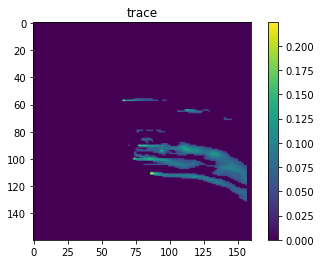

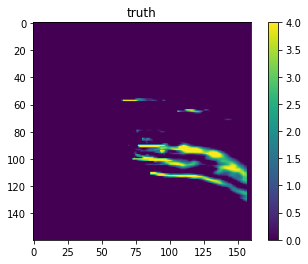

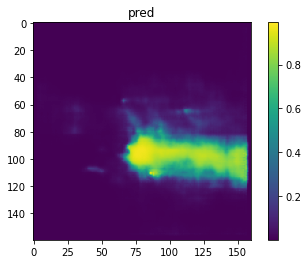

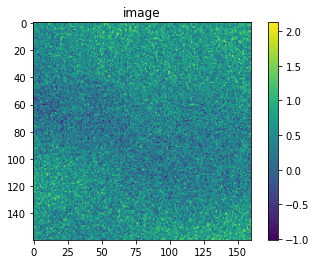

In [38]:
idx = int(np.random.uniform(0,data.N_valid*0.2))

plt.figure()
plt.imshow(np.squeeze(data.trace_valid[idx]))
plt.colorbar()
plt.title("trace")

plt.figure()
plt.imshow(np.squeeze(data.y_valid[idx]))
plt.colorbar()
plt.title("truth")

plt.figure()
plt.imshow(np.squeeze(model(tf.expand_dims(data.x_valid[0][idx], 0))[0]))
plt.colorbar()
plt.title("pred")

plt.figure()
plt.imshow(np.squeeze(data.x_valid[0][idx]))
plt.colorbar()
plt.title("image")
